In [287]:
import json
from fast_bleu import BLEU, SelfBLEU
import matplotlib.pyplot as plt
import seaborn as sns

# with open("data/experiments/first_experiment_100_tech.json", 'r') as f:
with open("data/experiments/second_experiment/100_tech_sentences.json", 'r') as f:
    generated_sentences = json.load(f)

In [288]:
import pandas as pd
import json

def process_and_concatenate_data():
    base_path = 'data/SkillSpan/json/'
    file_names = ['train.json']

    dfs = {}

    for file_name in file_names:
        file_path = base_path + file_name
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            df = pd.DataFrame(json_data)
            df['idx'] = df['idx'].apply(lambda x: f'{file_name.split(".")[0]}{x}')
            dfs[file_name.split('.')[0]] = df

    combined_tech_df = pd.concat([dfs[key][dfs[key]["source"] == "tech"].copy() for key in dfs], ignore_index=True)
    combined_house_df = pd.concat([dfs[key][dfs[key]["source"] == "house"].copy() for key in dfs], ignore_index=True)

    return combined_tech_df, combined_house_df

tech_df, house_df = process_and_concatenate_data()

house_df

,idx,tokens,tags_skill,tags_knowledge,source
0,train81,"[Were, changing, the, way, people, enjoy, win...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
1,train81,"[By, harnessing, the, power, of, technology, a...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
2,train81,"[Over, the, next, ten, years, the, global, mar...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
3,train81,"[Now, is, the, time, to, join, a, fast, paced,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O]",house
4,train81,"[We, are, looking, for, an, experienced, Busin...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
...,...,...,...,...,...
1662,train140,"[Furthermore, we, expect, you, to, be, able, t...","[O, O, O, O, O, O, O, O, B, I, I, I, I, I, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
1663,train140,"[You, are, structured, and, proactive, and, yo...","[O, O, B, O, B, O, O, O, O, B, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
1664,train140,"[You, are, a, holistic, and, fact, based, prag...","[O, O, O, B, O, B, I, B, B, I, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house
1665,train140,"[Last, but, not, least, you, both, have, the, ...","[O, O, O, O, O, O, O, O, B, I, I, I, I, I, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house


In [289]:
def count_sentences_with_tags(df):
    df['skill_B_present'] = df['tags_skill'].apply(lambda tags: 'B' in tags)
    df['knowledge_B_present'] = df['tags_knowledge'].apply(lambda tags: 'B' in tags)

    count_sentences_with_B = df[['skill_B_present', 'knowledge_B_present']].any(axis=1).sum()

    return count_sentences_with_B

count_sentences_with_tags(house_df)
count_sentences_with_tags(tech_df)

1022

In [290]:
tech_df_with_skills = tech_df.loc[(tech_df['skill_B_present'] | tech_df['knowledge_B_present'])].copy()

tech_df_with_skills

,idx,tokens,tags_skill,tags_knowledge,source,skill_B_present,knowledge_B_present
14,train1,"[Business, to, Business, Information, Technolo...","[O, O, O, O, O, O, O]","[B, I, I, B, I, B, I]",tech,False,True
20,train1,"[docker, agile, selenium, circleci, jenkins]","[O, O, O, O, O]","[B, B, B, B, B]",tech,False,True
23,train1,"[You, will, be, working, in, an, end-to-end, c...","[O, O, O, O, O, O, O, O, O, O, O, O, B, I, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",tech,True,True
25,train1,"[Design, and, implement, complex, end-to-end, ...","[B, I, I, I, I, I, O]","[O, O, O, O, O, O, O]",tech,True,False
26,train1,"[Work, hands-on, together, with, the, other, e...","[B, I, O, O, O, O, O, O, O, O, O, O, O, B, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",tech,True,True
...,...,...,...,...,...,...,...
3110,train79,"[Quality, Assurance, Engineer, (, f/m/d, ), <O...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",tech,False,True
3115,train79,"[WHAT, YOU, WILL, DO, Work, on, hearing, test,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, B, I, O, B, I, I, O, O, B, ...",tech,True,True
3118,train80,"[Senior, Frontend, Developer, |, React, JS, De...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",tech,False,True
3123,train80,"[We're, looking, for, an, experienced, smart, ...","[O, O, O, O, B, B, O, B, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",tech,True,True


In [291]:
house_df_with_skills = house_df.loc[(house_df['skill_B_present'] | house_df['knowledge_B_present'])].copy()

house_df_with_skills 

,idx,tokens,tags_skill,tags_knowledge,source,skill_B_present,knowledge_B_present
5,train81,"[You, will, do, this, by, setting, up, partner...","[O, O, O, O, O, B, I, I, O, B, I, B, I, O, B, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
8,train81,"[RESPONSIBILITIES, Develop, and, implement, a,...","[O, B, I, I, I, I, I, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O]",house,True,False
9,train81,"[You, will, do, this, by, using, <ORGANIZATION...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
10,train81,"[You, will, be, doing, this, by, finding, the,...","[O, O, O, O, O, O, B, I, I, I, O, B, I, I, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
11,train81,"[Improve, supply, for, the, <ORGANIZATION>, us...","[B, I, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O]",house,True,False
...,...,...,...,...,...,...,...
1662,train140,"[Furthermore, we, expect, you, to, be, able, t...","[O, O, O, O, O, O, O, O, B, I, I, I, I, I, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
1663,train140,"[You, are, structured, and, proactive, and, yo...","[O, O, B, O, B, O, O, O, O, B, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
1664,train140,"[You, are, a, holistic, and, fact, based, prag...","[O, O, O, B, O, B, I, B, B, I, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False
1665,train140,"[Last, but, not, least, you, both, have, the, ...","[O, O, O, O, O, O, O, O, B, I, I, I, I, I, I, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",house,True,False


In [292]:
tech_df_with_skills['sentence'] = tech_df_with_skills['tokens'].apply(' '.join)

sentences_test_tech_joined = tech_df_with_skills['sentence'].tolist()

sentences_test_tech_joined

['Business to Business Information Technology Web Technology',
 'docker agile selenium circleci jenkins',
 'You will be working in an end-to-end cross-functional team being responsible for implementing and promoting all QA relevant topics on team level .',
 'Design and implement complex end-to-end tests .',
 'Work hands-on together with the other engineers within the Agile team - to ensure continuous quality delivery of automated acceptance API and performance tests - while constantly collaborating with the QA Engineers of the other teams .',
 'Own a thought-leadership influence regarding QA relevant topics within the Agile team .',
 'At least 5 years of combined experience in Java or Kotlin and JavaScript or TypeScript programming and related test frameworks ( Selenium TestCafe etc.) .',
 'Good understanding of Agile methodologies and Continuous Delivery .',
 'Experience in working on a cloud-based application running on Docker .',
 'A degree in Computer Science or related fields or e

In [293]:
sentences_test_tech_joined

['Business to Business Information Technology Web Technology',
 'docker agile selenium circleci jenkins',
 'You will be working in an end-to-end cross-functional team being responsible for implementing and promoting all QA relevant topics on team level .',
 'Design and implement complex end-to-end tests .',
 'Work hands-on together with the other engineers within the Agile team - to ensure continuous quality delivery of automated acceptance API and performance tests - while constantly collaborating with the QA Engineers of the other teams .',
 'Own a thought-leadership influence regarding QA relevant topics within the Agile team .',
 'At least 5 years of combined experience in Java or Kotlin and JavaScript or TypeScript programming and related test frameworks ( Selenium TestCafe etc.) .',
 'Good understanding of Agile methodologies and Continuous Delivery .',
 'Experience in working on a cloud-based application running on Docker .',
 'A degree in Computer Science or related fields or e

In [294]:
cleaned_sentences = [sentence.replace("@@", "").replace("##", "") for sentence in generated_sentences]

print(cleaned_sentences) 

['"Computer Programming experience ( e.g .', 'Cognitive Psychology', '- a very comprehensive understanding of cloud technologies modern techniques and features as well as being super utilise computer-aided software engineering tools in this area.', 'Use concurrent programming.', 'Senior iOS Developer <ORGANIZATION> <ADDRESS> <ADDRESS> <ADDRESS> <ADDRESS> <LOCATION> Date posted: 2021-02-20 Likes: 0 Dislikes: 0 Love: 0 Job description: Location options: Remote Job type: Full-time Experience level: Mid-Level Senior Role: Mobile Developer Industry: software frameworks data mining Company size: 51–200 people Company type: Private Technologies swift Job description We are looking for a Senior iOS Developer for <ORGANIZATION> company projects .', 'Senior Full Stack Engineer <ORGANIZATION> <ADDRESS> <ADDRESS> <ADDRESS> <ADDRESS> <LOCATION> Date posted: 2021-02-13 Likes: 0 Dislikes: 1 Love: 0 Job description: Compensation: €50k - 90k Location options: Remote Job type: Full-time Experience level

In [295]:
cleaned_sentences = [sentence.replace("@@", "").replace("##", "") for sentence in generated_sentences]

print(cleaned_sentences)

['"Computer Programming experience ( e.g .', 'Cognitive Psychology', '- a very comprehensive understanding of cloud technologies modern techniques and features as well as being super utilise computer-aided software engineering tools in this area.', 'Use concurrent programming.', 'Senior iOS Developer <ORGANIZATION> <ADDRESS> <ADDRESS> <ADDRESS> <ADDRESS> <LOCATION> Date posted: 2021-02-20 Likes: 0 Dislikes: 0 Love: 0 Job description: Location options: Remote Job type: Full-time Experience level: Mid-Level Senior Role: Mobile Developer Industry: software frameworks data mining Company size: 51–200 people Company type: Private Technologies swift Job description We are looking for a Senior iOS Developer for <ORGANIZATION> company projects .', 'Senior Full Stack Engineer <ORGANIZATION> <ADDRESS> <ADDRESS> <ADDRESS> <ADDRESS> <LOCATION> Date posted: 2021-02-13 Likes: 0 Dislikes: 1 Love: 0 Job description: Compensation: €50k - 90k Location options: Remote Job type: Full-time Experience level

In [296]:
df_tech = pd.DataFrame(sentences_test_tech_joined, columns=['sentence'])
df_tech['source'] = 'SkillSpan'

df_generated = pd.DataFrame(cleaned_sentences, columns=['sentence'])
df_generated['source'] = 'Generated' 

combined_df = pd.concat([df_tech, df_generated], ignore_index=True)

In [297]:
combined_df

,sentence,source
0,Business to Business Information Technology We...,SkillSpan
1,docker agile selenium circleci jenkins,SkillSpan
2,You will be working in an end-to-end cross-fun...,SkillSpan
3,Design and implement complex end-to-end tests .,SkillSpan
4,Work hands-on together with the other engineer...,SkillSpan
...,...,...
1117,You will enjoy working with a modern tech stac...,Generated
1118,"Experience with Common Lisp, Drupal and techni...",Generated
1119,Business Intelligence or Data Quality Assessment,Generated
1120,Everything is not ready ( and probably never w...,Generated


In [298]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_embeddings(sentences):
    return model.encode(sentences,
                        batch_size=32, 
                        show_progress_bar=True)

In [299]:
e = get_embeddings(combined_df['sentence'])

Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:03<00:00, 11.31it/s]


In [300]:
embedding_df = pd.DataFrame(e)

embedding_df.to_csv('./data/embeddings/first_expermient.tsv', sep='\t', index=None, header=None)

embedding_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.024865,0.017947,-0.040454,-0.056915,-0.061426,-0.019198,0.066176,0.054136,-0.038444,-0.091445,...,0.012230,-0.048256,0.062245,0.012779,-0.014721,0.055732,-0.006984,-0.096294,0.072638,0.002100
1,0.024197,0.072579,-0.039960,-0.001578,0.045438,-0.083719,-0.091204,-0.001154,-0.016739,-0.041858,...,0.111283,0.087864,0.113997,-0.009034,-0.002809,-0.012942,-0.011428,0.044474,0.122381,0.053864
2,-0.076322,-0.031899,-0.049592,-0.019529,-0.018746,-0.003498,-0.050704,0.000859,0.012402,-0.019608,...,0.037789,0.051283,0.015045,-0.010147,-0.010862,-0.006261,0.100465,-0.028190,0.014030,0.056370
3,-0.033608,0.077187,-0.017860,-0.010300,-0.024969,-0.099915,-0.099457,0.071872,-0.051332,0.015010,...,-0.023926,-0.007248,0.010913,0.006205,-0.037984,0.069206,0.113998,0.027634,0.012265,-0.006105
4,-0.089323,0.042763,-0.067500,0.041785,-0.014342,-0.069656,-0.026351,0.005371,0.056269,-0.030407,...,0.011619,-0.027137,0.014388,-0.057704,0.003725,0.042375,0.033069,0.005085,0.115094,0.094069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,-0.067613,-0.042133,-0.015013,-0.034637,-0.008839,-0.022142,0.062723,-0.019967,-0.031127,0.016170,...,0.030983,0.013532,0.019741,0.015507,0.020863,0.080808,0.038039,0.011742,0.034688,-0.008224
1118,-0.021710,-0.089890,0.053871,-0.062700,-0.001766,-0.078773,0.005968,0.063367,-0.043934,-0.012476,...,0.066276,0.049789,0.048397,-0.034489,0.040326,0.087626,-0.033656,0.025938,0.030026,0.082096
1119,0.016704,-0.020080,-0.046630,0.027411,-0.066012,-0.071402,0.005414,-0.046400,-0.043181,0.040183,...,0.015610,-0.012069,0.017793,0.020301,-0.051520,0.044540,0.017687,-0.022525,0.029433,-0.015010
1120,-0.021865,-0.086616,0.037257,0.008933,0.012320,-0.007990,-0.025503,-0.069678,-0.047570,-0.007310,...,0.024199,0.033936,0.022640,-0.021803,0.008238,0.060162,0.024621,-0.061888,-0.017240,-0.006788


In [301]:
# Save dataframe without any index
combined_df.to_csv('./data/embeddings/first_expermient_metadata.tsv', index=False, sep='\t')

combined_df

,sentence,source
0,Business to Business Information Technology We...,SkillSpan
1,docker agile selenium circleci jenkins,SkillSpan
2,You will be working in an end-to-end cross-fun...,SkillSpan
3,Design and implement complex end-to-end tests .,SkillSpan
4,Work hands-on together with the other engineer...,SkillSpan
...,...,...
1117,You will enjoy working with a modern tech stac...,Generated
1118,"Experience with Common Lisp, Drupal and techni...",Generated
1119,Business Intelligence or Data Quality Assessment,Generated
1120,Everything is not ready ( and probably never w...,Generated


In [302]:
from sklearn.manifold import TSNE

# Initialize t-SNE and reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=50, random_state=42, learning_rate='auto')
tsne_results = tsne.fit_transform(embedding_df)  # Using normalized embeddings for better results

# Convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['PC1', 'PC2'])
tsne_df

,PC1,PC2
0,-14.954256,-28.268263
1,27.889734,6.793785
2,-13.888912,-7.435428
3,5.475015,-3.461074
4,-16.686226,5.517781
...,...,...
1117,6.510406,14.693737
1118,-3.358020,7.374845
1119,-13.051598,-22.871733
1120,-7.001380,20.969534


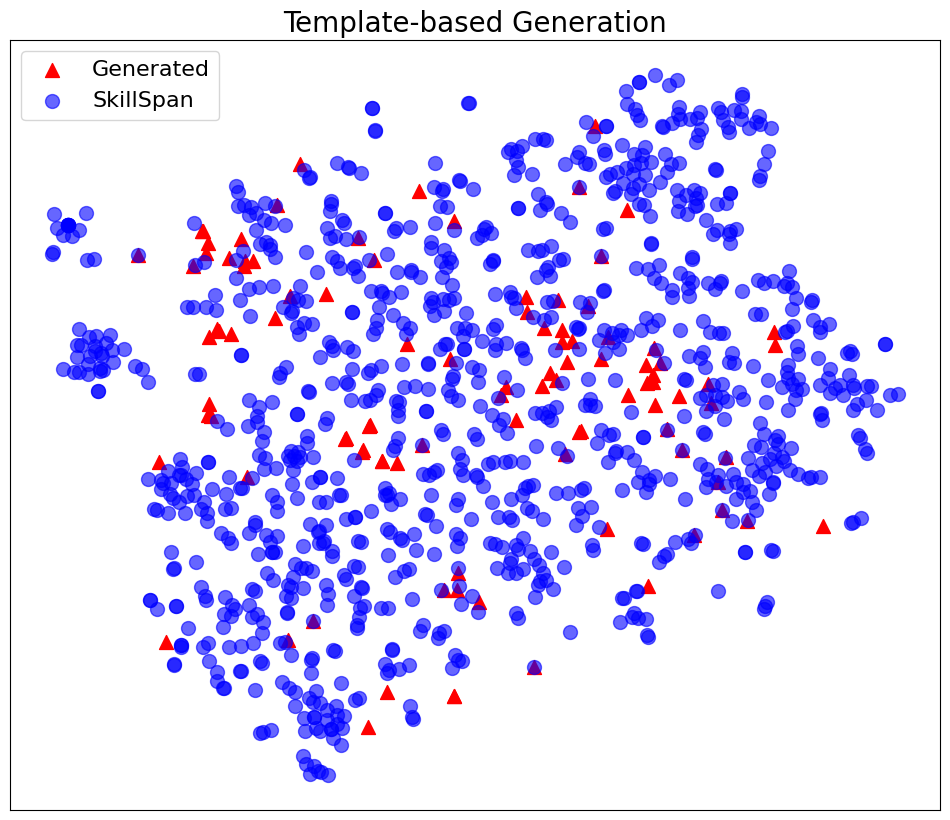

In [304]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, random_state=1, learning_rate='auto')
tsne_results = tsne.fit_transform(embedding_df)

tsne_df = pd.DataFrame(tsne_results, columns=['PC1', 'PC2'])
tsne_df = pd.concat([tsne_df, combined_df], axis=1)

color_map = {'SkillSpan': 'blue', 'Generated': 'red'}
marker_map = {'SkillSpan': 'o', 'Generated': '^'}

plt.figure(figsize=(12, 10))
for source, group_df in tsne_df.groupby('source'):
    if source == 'SkillSpan':
        plt.scatter(group_df['PC1'], group_df['PC2'], s=100, c=color_map[source], 
                    marker=marker_map[source], label=source, alpha=0.6)  
    else:
        plt.scatter(group_df['PC1'], group_df['PC2'], s=100, c=color_map[source], 
                    marker=marker_map[source], label=source, alpha=1)  


plt.title('Template-based Generation', fontsize=20)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.legend(fontsize=16)  
plt.show()

In [219]:
splitten_sentences = [sentence.split() for sentence in cleaned_sentences]
weights = {'bigram': (1/2., 1/2.), 'trigram': (1/3., 1/3., 1/3.)}

In [220]:
from fast_bleu import BLEU, SelfBLEU


self_bleu = SelfBLEU(splitten_sentences, weights)
sum(self_bleu.get_score()['bigram']) / len(self_bleu.get_score()['bigram'])

0.7636108930542511